<a href="https://colab.research.google.com/github/beryl09/beryl09/blob/main/Ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Area of interest:**

Analyze Effects of rate of  school dropouts in colorado counties


**Importing Modules**

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

**Importing map modules for ploting maps**

In [ ]:
!pip install mapclassify
import mapclassify

** Importing a shapefile from drive and assigning a variable**

In [ ]:
! wget -q -O a.zip https://github.com/beryl09/beryl09/raw/main/Colorado_County_Boundaries.zip

In [ ]:
zip_ref = zipfile.ZipFile('a.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


<Axes: >

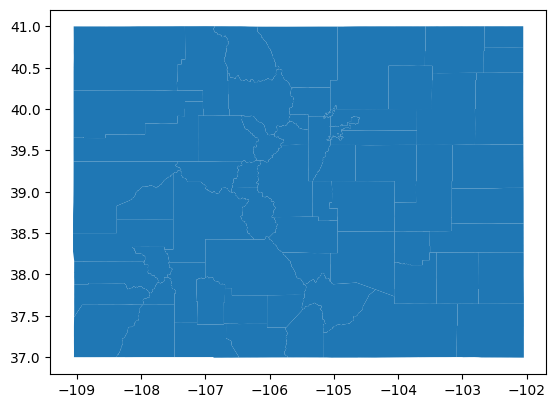

In [ ]:
# make a map
colc.plot()

In [ ]:
!ls

a.zip					   Colorado_County_Boundaries.prj  sample_data
CDPHE_CDOE_School_District_Boundaries.zip  Colorado_County_Boundaries.shp  schools.xlsx
Colorado_County_Boundaries.cpg		   Colorado_County_Boundaries.shx
Colorado_County_Boundaries.dbf		   col.zip


In [ ]:
colc=gpd.read_file('Colorado_County_Boundaries.shp') #load the shapefile with gpd as colc

In [ ]:
! wget -q -O schools.xlsx https://github.com/beryl09/beryl09/raw/main/2021-2022_Dropout%20Rates%20by%20School%20and%20Race_Ethnicity.xlsx

In [ ]:
colc.dtypes  #with geopandas can do stuff like with pandas :)

OBJECTID        int64
COUNTY         object
FULL           object
LABEL          object
CNTY_FIPS      object
NUM_FIPS        int64
CENT_LAT      float64
CENT_LONG     float64
US_FIPS        object
geometry     geometry
dtype: object

In [ ]:
data_var =['DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)']

In [ ]:
sch=pd.read_excel('/content/schools.xlsx') #load the schools xlsx file

In [ ]:
sch.head(4)

,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY),29647.0,4990.0,0.168,14037.0,2222.0,...,1231.0,211.0,0.171,609.0,102.0,0.167,622.0,109.0,0.175,
2,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (EXCLUDING ALTERNATIVE SCHO...,446579.0,5534.0,0.012,218286.0,2132.0,...,20319.0,256.0,0.013,9973.0,91.0,0.009,10346.0,165.0,0.016,
3,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (INCLUDING ALTERNATIVE SCHO...,476226.0,10524.0,0.022,232323.0,4354.0,...,21550.0,467.0,0.022,10582.0,193.0,0.018,10968.0,274.0,0.025,


In [ ]:
sch['School Name / Category (include or exclude alternative schools)'].value_counts()

DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (EXCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY)         185
SUMMER SCHOOL DROPOUTS (NONE)                            177
SUMMER SCHOOL DROPOUTS                                     8
                                                        ... 
Dora Moore ECE-8 School                                    1
Morey Middle School                                        1
Noel Community Arts School                                 1
North High School Engagement Center                        1
Yampah Mountain School                                     1
Name: School Name / Category (include or exclude alternative schools), Length: 979, dtype: int64

In [ ]:
schTot=sch[sch['School Name / Category (include or exclude alternative schools)']=='DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)']

In [ ]:
schTot


,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
22,ADAMS,10.0,Mapleton 1,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,5547.0,159.0,0.029,2821.0,76.0,...,176.0,7.0,0.040,91.0,4.0,0.044,85.0,3.0,0.035,
48,ADAMS,20.0,Adams 12 Five Star Schools,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,19532.0,482.0,0.025,9424.0,173.0,...,841.0,8.0,0.010,421.0,2.0,0.005,420.0,6.0,0.014,
56,ADAMS,30.0,Adams County 14,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3432.0,247.0,0.072,1638.0,88.0,...,25.0,2.0,0.080,7.0,0.0,0.000,18.0,2.0,0.111,
76,ADAMS,40.0,School District 27J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,10341.0,135.0,0.013,5072.0,58.0,...,357.0,5.0,0.014,174.0,3.0,0.017,183.0,2.0,0.011,
82,ADAMS,50.0,Bennett 29J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,693.0,6.0,0.009,332.0,1.0,...,39.0,0.0,0.000,18.0,0.0,0.000,21.0,0.0,0.000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,COLORADO BOCS,9035.0,Centennial BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,210.0,77.0,0.367,84.0,29.0,...,3.0,2.0,0.667,1.0,0.0,0.000,2.0,2.0,1.000,
1704,COLORADO BOCS,9050.0,San Juan BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,80.0,0.0,0.000,44.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,
1709,COLORADO BOCS,9130.0,Expeditionary BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,192.0,0.0,0.000,81.0,0.0,...,15.0,0.0,0.000,5.0,0.0,0.000,10.0,0.0,0.000,
1721,COLORADO BOCS,9170.0,Education reEnvisioned BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3368.0,108.0,0.032,1770.0,50.0,...,231.0,8.0,0.035,113.0,1.0,0.009,118.0,7.0,0.059,


In [ ]:
schTot.dtypes

County Name                                                         object
Organization Code                                                  float64
Organization Name                                                   object
School Code                                                         object
School Name / Category (include or exclude alternative schools)     object
                                                                    ...   
Two or More Races Female Dropout Rate                              float64
Two or More Races Male Pupil Count                                 float64
Two or More Races Male Dropouts                                    float64
Two or More Races Male Dropout Rate                                float64
School Closed Note                                                  object
Length: 78, dtype: object

In [ ]:
a1=schTot.groupby('County Name').agg(sum)

<ipython-input-63-a9169f4bf82f>:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  a1=schTot.groupby('County Name').agg(sum)


In [ ]:
a2=pd.merge(colc,a1,left_on='COUNTY',right_on='County Name',indicator=True)

In [ ]:
a2

,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,_merge
0,1,LARIMER,Larimer County,Larimer,069,69,40.666413,-105.461155,08069,"POLYGON ((-105.05672 40.34928, -105.05670 40.3...",...,888.0,14.0,0.029,422.0,6.0,0.020,466.0,8.0,0.037,both
1,2,LAS ANIMAS,Las Animas County,Las Animas,071,71,37.315851,-104.038716,08071,"POLYGON ((-104.14318 37.75833, -104.12615 37.7...",...,20.0,0.0,0.000,8.0,0.0,0.000,12.0,0.0,0.000,both
2,3,FREMONT,Fremont County,Fremont,043,43,38.472972,-105.439657,08043,"POLYGON ((-105.36889 38.25940, -105.36909 38.2...",...,102.0,1.0,0.015,59.0,0.0,0.000,43.0,1.0,0.037,both
3,4,GUNNISON,Gunnison County,Gunnison,051,51,38.666798,-107.031700,08051,"POLYGON ((-106.79969 38.97965, -106.80009 38.9...",...,25.0,0.0,0.000,8.0,0.0,0.000,17.0,0.0,0.000,both
4,5,CONEJOS,Conejos County,Conejos,021,21,37.200696,-106.191629,08021,"POLYGON ((-106.14887 37.40110, -106.14753 37.4...",...,2.0,0.0,0.000,1.0,0.0,0.000,1.0,0.0,0.000,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,60,DENVER,Denver County,Denver,031,31,39.762028,-104.876365,08031,"MULTIPOLYGON (((-104.93413 39.70015, -104.9341...",...,1979.0,70.0,0.035,961.0,34.0,0.035,1018.0,36.0,0.035,both
59,61,PARK,Park County,Park,093,93,39.119303,-105.717175,08093,"POLYGON ((-105.97508 38.91009, -105.97529 38.9...",...,32.0,1.0,0.050,11.0,1.0,0.100,21.0,0.0,0.000,both
60,62,EL PASO,El Paso County,El Paso,041,41,38.832093,-104.525583,08041,"POLYGON ((-104.86402 39.12979, -104.86381 39.1...",...,5217.0,158.0,0.358,2624.0,70.0,1.134,2593.0,88.0,0.273,both
61,63,ARAPAHOE,Arapahoe County,Arapahoe,005,5,39.649772,-104.339219,08005,"MULTIPOLYGON (((-104.89915 39.62413, -104.8991...",...,3534.0,57.0,0.138,1749.0,24.0,0.123,1785.0,33.0,0.157,both


In [ ]:
a2.dtypes

OBJECTID                                    int64
COUNTY                                     object
FULL                                       object
LABEL                                      object
CNTY_FIPS                                  object
                                           ...   
Two or More Races Female Dropout Rate     float64
Two or More Races Male Pupil Count        float64
Two or More Races Male Dropouts           float64
Two or More Races Male Dropout Rate       float64
_merge                                   category
Length: 84, dtype: object

<Axes: >

[]

[]

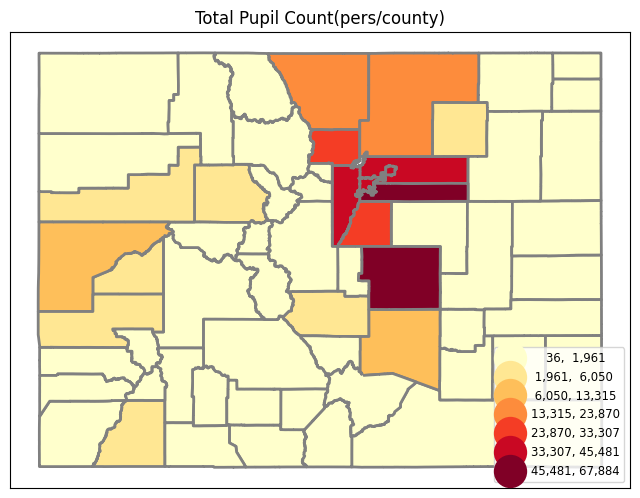

In [ ]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(8,10))
a2.plot(ax=ax,column='Total Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=7,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':2.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Total Pupil Count(pers/county)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [ ]:
!wget -q -O col.zip  https://github.com/beryl09/beryl09/raw/main/Population%20by%20Race_Ethnicity%20and%20Age%202020%20Counties.xlsx
#zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()

In [ ]:
colc.dtypes  #with geopandas can do stuff like with pandas :)

OBJECTID        int64
COUNTY         object
FULL           object
LABEL          object
CNTY_FIPS      object
NUM_FIPS        int64
CENT_LAT      float64
CENT_LONG     float64
US_FIPS        object
geometry     geometry
dtype: object

In [ ]:
data_var =['COLORADO TOTAL POPULATION']

In [ ]:
sch=pd.read_excel('/content/schools.xlsx') #load the schools xlsx file

In [ ]:
sch.head(12)

,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY),29647.0,4990.0,0.168,14037.0,2222.0,...,1231.0,211.0,0.171,609.0,102.0,0.167,622.0,109.0,0.175,
2,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (EXCLUDING ALTERNATIVE SCHO...,446579.0,5534.0,0.012,218286.0,2132.0,...,20319.0,256.0,0.013,9973.0,91.0,0.009,10346.0,165.0,0.016,
3,,9999.0,STATE TOTAL,9999,STATE GRAND TOTALS (INCLUDING ALTERNATIVE SCHO...,476226.0,10524.0,0.022,232323.0,4354.0,...,21550.0,467.0,0.022,10582.0,193.0,0.018,10968.0,274.0,0.025,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ADAMS,10.0,Mapleton 1,0187,Mapleton Expeditionary School of the Arts,709.0,15.0,0.021,379.0,6.0,...,24.0,0.0,0.000,17.0,0.0,0.000,7.0,0.0,0.000,
6,ADAMS,10.0,Mapleton 1,0212,Mapleton Early College High School,310.0,7.0,0.023,174.0,2.0,...,7.0,1.0,0.143,1.0,0.0,0.000,6.0,1.0,0.167,
7,ADAMS,10.0,Mapleton 1,0263,Global Leadership Academy,386.0,17.0,0.044,204.0,8.0,...,4.0,0.0,0.000,3.0,0.0,0.000,1.0,0.0,0.000,
8,ADAMS,10.0,Mapleton 1,0309,Academy High School,543.0,20.0,0.037,235.0,4.0,...,7.0,0.0,0.000,3.0,0.0,0.000,4.0,0.0,0.000,
9,ADAMS,10.0,Mapleton 1,0501,Monterey Community School,113.0,0.0,0.000,61.0,0.0,...,1.0,0.0,0.000,0.0,0.0,0.000,1.0,0.0,0.000,


In [ ]:
sch['School Name / Category (include or exclude alternative schools)'].value_counts()

DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (EXCLUDING ALTERNATIVE SCHOOLS)    185
DISTRICT GRAND TOTALS (ALTERNATIVE SCHOOLS ONLY)         185
SUMMER SCHOOL DROPOUTS (NONE)                            177
SUMMER SCHOOL DROPOUTS                                     8
                                                        ... 
Dora Moore ECE-8 School                                    1
Morey Middle School                                        1
Noel Community Arts School                                 1
North High School Engagement Center                        1
Yampah Mountain School                                     1
Name: School Name / Category (include or exclude alternative schools), Length: 979, dtype: int64

In [ ]:
Totschdropout=sch[sch['School Name / Category (include or exclude alternative schools)']=='DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE SCHOOLS)']

In [ ]:
Totschdropout

,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
22,ADAMS,10.0,Mapleton 1,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,5547.0,159.0,0.029,2821.0,76.0,...,176.0,7.0,0.040,91.0,4.0,0.044,85.0,3.0,0.035,
48,ADAMS,20.0,Adams 12 Five Star Schools,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,19532.0,482.0,0.025,9424.0,173.0,...,841.0,8.0,0.010,421.0,2.0,0.005,420.0,6.0,0.014,
56,ADAMS,30.0,Adams County 14,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3432.0,247.0,0.072,1638.0,88.0,...,25.0,2.0,0.080,7.0,0.0,0.000,18.0,2.0,0.111,
76,ADAMS,40.0,School District 27J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,10341.0,135.0,0.013,5072.0,58.0,...,357.0,5.0,0.014,174.0,3.0,0.017,183.0,2.0,0.011,
82,ADAMS,50.0,Bennett 29J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,693.0,6.0,0.009,332.0,1.0,...,39.0,0.0,0.000,18.0,0.0,0.000,21.0,0.0,0.000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,COLORADO BOCS,9035.0,Centennial BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,210.0,77.0,0.367,84.0,29.0,...,3.0,2.0,0.667,1.0,0.0,0.000,2.0,2.0,1.000,
1704,COLORADO BOCS,9050.0,San Juan BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,80.0,0.0,0.000,44.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,
1709,COLORADO BOCS,9130.0,Expeditionary BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,192.0,0.0,0.000,81.0,0.0,...,15.0,0.0,0.000,5.0,0.0,0.000,10.0,0.0,0.000,
1721,COLORADO BOCS,9170.0,Education reEnvisioned BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3368.0,108.0,0.032,1770.0,50.0,...,231.0,8.0,0.035,113.0,1.0,0.009,118.0,7.0,0.059,


In [ ]:
Totschdropout.groupby('County Name').agg(sum)

<ipython-input-76-6c0744a2f61b>:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  Totschdropout.groupby('County Name').agg(sum)


,Organization Code,Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,Female Total Dropout Rate,Total Male Pupil Count,Total Male Dropouts,Total Male Dropout Rate,...,Native Hawaiian or Other Pacific Islander Male Dropout Rate,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate
County Name,,,,,,,,,,,,,,,,,,,,,
ADAMS,280.0,44832.0,1185.0,0.188,21847.0,464.0,0.152,22985.0,721.0,0.221,...,0.083,1550.0,26.0,0.221,764.0,10.0,0.089,786.0,16.0,0.291
ALAMOSA,210.0,1267.0,21.0,0.019,601.0,11.0,0.021,666.0,10.0,0.017,...,0.000,30.0,2.0,0.080,11.0,0.0,0.000,19.0,2.0,0.125
ARAPAHOE,1053.0,66418.0,947.0,0.146,32368.0,384.0,0.118,34050.0,563.0,0.166,...,0.113,3534.0,57.0,0.138,1749.0,24.0,0.123,1785.0,33.0,0.157
ARCHULETA,220.0,919.0,9.0,0.010,439.0,5.0,0.011,480.0,4.0,0.008,...,0.000,24.0,0.0,0.000,14.0,0.0,0.000,10.0,0.0,0.000
BACA,1250.0,317.0,5.0,0.053,158.0,1.0,0.029,159.0,4.0,0.069,...,0.000,10.0,0.0,0.000,5.0,0.0,0.000,5.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUMMIT,3000.0,1825.0,14.0,0.008,838.0,5.0,0.006,987.0,9.0,0.009,...,0.000,61.0,1.0,0.016,25.0,0.0,0.000,36.0,1.0,0.028
TELLER,6030.0,1304.0,21.0,0.031,614.0,6.0,0.028,690.0,15.0,0.034,...,0.000,44.0,0.0,0.000,22.0,0.0,0.000,22.0,0.0,0.000
WASHINGTON,15250.0,465.0,4.0,0.030,211.0,2.0,0.035,254.0,2.0,0.025,...,0.000,6.0,0.0,0.000,4.0,0.0,0.000,2.0,0.0,0.000


In [ ]:
Totschdropout


,County Name,Organization Code,Organization Name,School Code,School Name / Category (include or exclude alternative schools),Total Pupil Count,Total Dropouts,Total Dropout Rate,Female Total Pupil Count,Female Total Dropouts,...,Two or More Races Pupil Count,Two or More Races Dropouts,Two or More Races Dropout Rate,Two or More Races Female Pupil Count,Two or More Races Female Dropouts,Two or More Races Female Dropout Rate,Two or More Races Male Pupil Count,Two or More Races Male Dropouts,Two or More Races Male Dropout Rate,School Closed Note
22,ADAMS,10.0,Mapleton 1,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,5547.0,159.0,0.029,2821.0,76.0,...,176.0,7.0,0.040,91.0,4.0,0.044,85.0,3.0,0.035,
48,ADAMS,20.0,Adams 12 Five Star Schools,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,19532.0,482.0,0.025,9424.0,173.0,...,841.0,8.0,0.010,421.0,2.0,0.005,420.0,6.0,0.014,
56,ADAMS,30.0,Adams County 14,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3432.0,247.0,0.072,1638.0,88.0,...,25.0,2.0,0.080,7.0,0.0,0.000,18.0,2.0,0.111,
76,ADAMS,40.0,School District 27J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,10341.0,135.0,0.013,5072.0,58.0,...,357.0,5.0,0.014,174.0,3.0,0.017,183.0,2.0,0.011,
82,ADAMS,50.0,Bennett 29J,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,693.0,6.0,0.009,332.0,1.0,...,39.0,0.0,0.000,18.0,0.0,0.000,21.0,0.0,0.000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,COLORADO BOCS,9035.0,Centennial BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,210.0,77.0,0.367,84.0,29.0,...,3.0,2.0,0.667,1.0,0.0,0.000,2.0,2.0,1.000,
1704,COLORADO BOCS,9050.0,San Juan BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,80.0,0.0,0.000,44.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,
1709,COLORADO BOCS,9130.0,Expeditionary BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,192.0,0.0,0.000,81.0,0.0,...,15.0,0.0,0.000,5.0,0.0,0.000,10.0,0.0,0.000,
1721,COLORADO BOCS,9170.0,Education reEnvisioned BOCES,9998,DISTRICT GRAND TOTALS (INCLUDING ALTERNATIVE S...,3368.0,108.0,0.032,1770.0,50.0,...,231.0,8.0,0.035,113.0,1.0,0.009,118.0,7.0,0.059,


In [ ]:
Totschdropout.dtypes

County Name                                                         object
Organization Code                                                  float64
Organization Name                                                   object
School Code                                                         object
School Name / Category (include or exclude alternative schools)     object
                                                                    ...   
Two or More Races Female Dropout Rate                              float64
Two or More Races Male Pupil Count                                 float64
Two or More Races Male Dropouts                                    float64
Two or More Races Male Dropout Rate                                float64
School Closed Note                                                  object
Length: 78, dtype: object

In [ ]:
Totschdropout = Totschdropout[['County Name', 'Two or More Races Male Pupil Count', 'Two or More Races Male Dropout Rate']]
Totschdropout = Totschdropout.iloc[1:,:]
Totschdropout

,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
48,ADAMS,420.0,0.014
56,ADAMS,18.0,0.111
76,ADAMS,183.0,0.011
82,ADAMS,21.0,0.000
89,ADAMS,13.0,0.077
...,...,...,...
1699,COLORADO BOCS,2.0,1.000
1704,COLORADO BOCS,0.0,0.000
1709,COLORADO BOCS,10.0,0.000
1721,COLORADO BOCS,118.0,0.059


In [ ]:
Totschdropout.groupby('County Name').agg(sum)
Totschdropout

,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
County Name,,
ADAMS,701.0,0.256
ALAMOSA,19.0,0.125
ARAPAHOE,1785.0,0.157
ARCHULETA,10.0,0.000
BACA,5.0,0.000
...,...,...
SUMMIT,36.0,0.028
TELLER,22.0,0.000
WASHINGTON,2.0,0.000


,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
48,ADAMS,420.0,0.014
56,ADAMS,18.0,0.111
76,ADAMS,183.0,0.011
82,ADAMS,21.0,0.000
89,ADAMS,13.0,0.077
...,...,...,...
1699,COLORADO BOCS,2.0,1.000
1704,COLORADO BOCS,0.0,0.000
1709,COLORADO BOCS,10.0,0.000
1721,COLORADO BOCS,118.0,0.059


In [ ]:
Totschdropout.dtypes

County Name                             object
Two or More Races Male Pupil Count     float64
Two or More Races Male Dropout Rate    float64
dtype: object

In [ ]:
Totschdropout

,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
48,ADAMS,420.0,0.014
56,ADAMS,18.0,0.111
76,ADAMS,183.0,0.011
82,ADAMS,21.0,0.000
89,ADAMS,13.0,0.077
...,...,...,...
1699,COLORADO BOCS,2.0,1.000
1704,COLORADO BOCS,0.0,0.000
1709,COLORADO BOCS,10.0,0.000
1721,COLORADO BOCS,118.0,0.059


In [ ]:
#merge
colc = pd.merge(
    left=colc,
    right=Totschdropout,
    left_on='COUNTY',
    right_on='County Name',
    how='outer'
)


In [ ]:
colc.dtypes

OBJECTID                                float64
COUNTY                                   object
FULL                                     object
LABEL                                    object
CNTY_FIPS                                object
NUM_FIPS                                float64
CENT_LAT                                float64
CENT_LONG                               float64
US_FIPS                                  object
geometry                               geometry
County Name                              object
Two or More Races Male Pupil Count      float64
Two or More Races Male Dropout Rate     float64
dtype: object

In [ ]:
#a3=schdropout.groupby('County Name').agg(sum)

In [ ]:
#a4=pd.merge(colc,a3,left_on='COUNTY',right_on='County Name',indicator=True)

<Axes: >

[]

[]

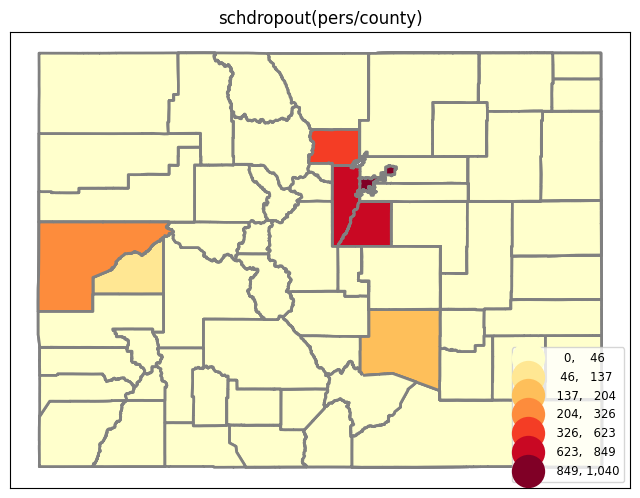

In [ ]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(8,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=7,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':2.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("schdropout(pers/county)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

PS3

In [ ]:
colc.dtypes

OBJECTID                                float64
COUNTY                                   object
FULL                                     object
LABEL                                    object
CNTY_FIPS                                object
NUM_FIPS                                float64
CENT_LAT                                float64
CENT_LONG                               float64
US_FIPS                                  object
geometry                               geometry
County Name                              object
Two or More Races Male Pupil Count      float64
Two or More Races Male Dropout Rate     float64
dtype: object

**Overlay and side-by side**

<Axes: >

[]

[]

<Axes: >

[]

[]

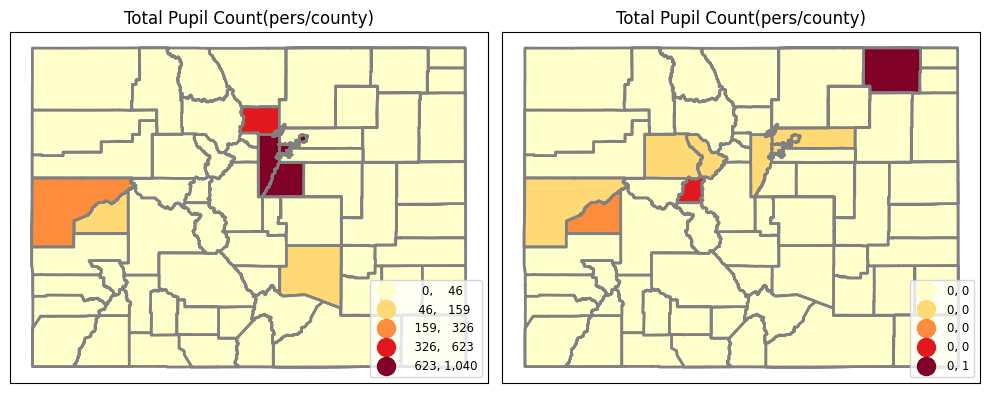

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,10),sharey=True, tight_layout=True)
colc.plot(ax=axs[0],column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Total Pupil Count(pers/county)")
axs[0].set_xticks([]); axs[0].set_yticks([])

colc.plot(ax=axs[1],column='Two or More Races Male Dropout Rate',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Total Pupil Count(pers/county)")
axs[1].set_xticks([]); axs[0].set_yticks([])

#colc.plot(ax=axs[1],column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         #edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        #'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#axs[1].title.set_text("schdropout(pers/county)")
#axs[1].set_xticks([]); axs[1].set_yticks([])

<Axes: >

<Axes: >

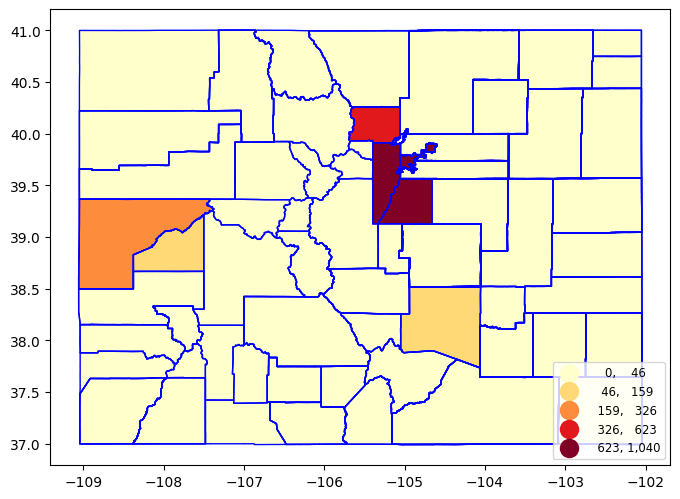

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
colc.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

In [ ]:
colc.COUNTY

0         LARIMER
1         LARIMER
2         LARIMER
3      LAS ANIMAS
4      LAS ANIMAS
          ...    
180           NaN
181           NaN
182           NaN
183           NaN
184           NaN
Name: COUNTY, Length: 185, dtype: object

In [ ]:
colc.dtypes

OBJECTID                                float64
COUNTY                                   object
FULL                                     object
LABEL                                    object
CNTY_FIPS                                object
NUM_FIPS                                float64
CENT_LAT                                float64
CENT_LONG                               float64
US_FIPS                                  object
geometry                               geometry
County Name                              object
Two or More Races Male Pupil Count      float64
Two or More Races Male Dropout Rate     float64
dtype: object

In [ ]:
colc_adams_arv= colc.query("COUNTY=='ADAMS' | COUNTY=='ARVADA '")

<Axes: >

<Axes: >

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

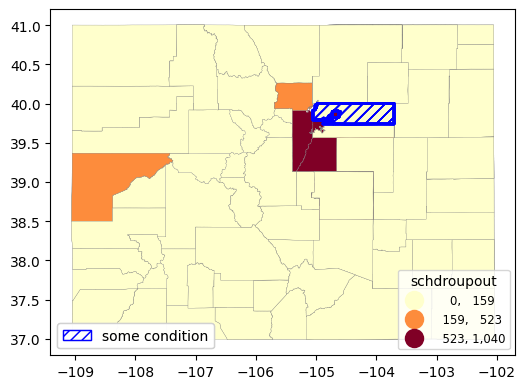

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=3,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

#just like subset and hash or dot
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1)
#njC_cam_cum.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='/')
colc_adams_arv.plot(ax=ax,edgecolor='blue',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''schdroupout''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='blue', facecolor='none',
                     hatch='///', label=r'some condition')

l2=plt.legend(handles=[bluePatch],loc='lower left')

ax.add_artist(l2)
ax.add_artist(l1)


#njC.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

<Axes: >

[]

[]

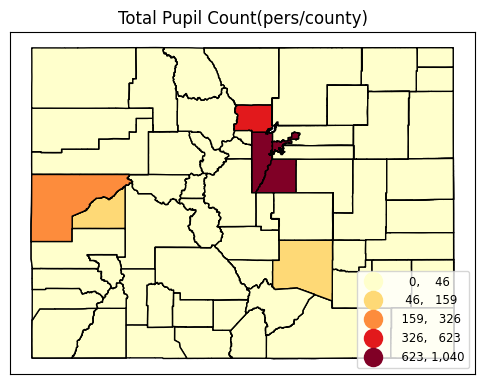

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
colc.plot(ax=ax,column='Two or More Races Male Pupil Count',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Total Pupil Count(pers/county)")
ax.set_xticks([]); ax.set_yticks([])

In [ ]:
colP = colc.copy()

colP["geometry"] = colP["geometry"].centroid

<ipython-input-96-473850ea7d21>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colP["geometry"] = colP["geometry"].centroid


In [ ]:
colP.head(3)

,OBJECTID,COUNTY,FULL,LABEL,CNTY_FIPS,NUM_FIPS,CENT_LAT,CENT_LONG,US_FIPS,geometry,County Name,Two or More Races Male Pupil Count,Two or More Races Male Dropout Rate
0,1.0,LARIMER,Larimer County,Larimer,069,69.0,40.666413,-105.461155,08069,POINT (-105.46116 40.66641),LARIMER,326.0,0.015
1,1.0,LARIMER,Larimer County,Larimer,069,69.0,40.666413,-105.461155,08069,POINT (-105.46116 40.66641),LARIMER,137.0,0.022
2,1.0,LARIMER,Larimer County,Larimer,069,69.0,40.666413,-105.461155,08069,POINT (-105.46116 40.66641),LARIMER,3.0,0.000


<Axes: >

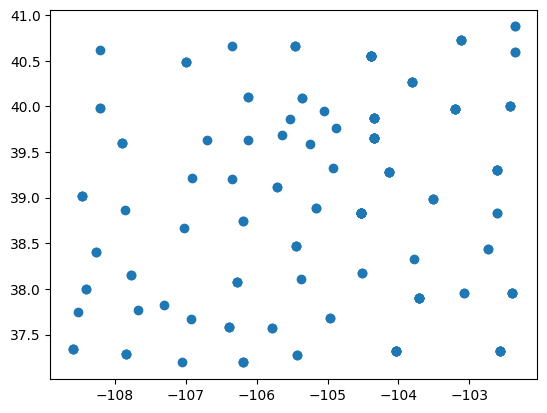

In [ ]:
colP.plot()

Text(-105.46115548980012, 40.66641349770813, 'LARIMER')

Text(-105.46115548980012, 40.66641349770813, 'LARIMER')

Text(-105.46115548980012, 40.66641349770813, 'LARIMER')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-104.03871637705168, 37.315850809856926, 'LAS ANIMAS')

Text(-105.43965706803802, 38.47297246255305, 'FREMONT')

Text(-105.43965706803802, 38.47297246255305, 'FREMONT')

Text(-105.43965706803802, 38.47297246255305, 'FREMONT')

Text(-107.0317001099653, 38.666797711104735, 'GUNNISON')

Text(-106.1916286181029, 37.20069644255063, 'CONEJOS')

Text(-106.1916286181029, 37.20069644255063, 'CONEJOS')

Text(-106.1916286181029, 37.20069644255063, 'CONEJOS')

Text(-106.69529923763477, 39.62782564739979, 'EAGLE')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-103.71644567833245, 37.90270171917909, 'OTERO')

Text(-107.84333549404869, 37.286558192167995, 'LA PLATA')

Text(-107.84333549404869, 37.286558192167995, 'LA PLATA')

Text(-107.84333549404869, 37.286558192167995, 'LA PLATA')

Text(-106.11637902444116, 39.63417044607419, 'SUMMIT')

Text(-105.36747178347522, 38.10867789893694, 'CUSTER')

Text(-106.9165777659542, 39.21710577119511, 'PITKIN')

Text(-103.7848256603325, 38.326661065525684, 'CROWLEY')

Text(-102.60339581229903, 38.82793972435137, 'CHEYENNE')

Text(-102.60339581229903, 38.82793972435137, 'CHEYENNE')

Text(-103.07170457865058, 37.95508557335066, 'BENT')

Text(-103.07170457865058, 37.95508557335066, 'BENT')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.33793521991743, 39.87363357874254, 'ADAMS')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-104.13589160796826, 39.28656012359368, 'ELBERT')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-102.42422632485443, 40.00289933021395, 'YUMA')

Text(-106.34483773129155, 39.20237947245436, 'LAKE')

Text(-107.86287686701995, 38.861373772698435, 'DELTA')

Text(-105.42826937221812, 37.27809647878283, 'COSTILLA')

Text(-105.42826937221812, 37.27809647878283, 'COSTILLA')

Text(-107.90395367789407, 39.59930662243108, 'GARFIELD')

Text(-107.90395367789407, 39.59930662243108, 'GARFIELD')

Text(-107.90395367789407, 39.59930662243108, 'GARFIELD')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-103.80982132355008, 40.26270700743742, 'MORGAN')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-102.39334899613554, 37.955183197732495, 'PROWERS')

Text(-108.59671297044125, 37.338413765858164, 'MONTEZUMA')

Text(-108.59671297044125, 37.338413765858164, 'MONTEZUMA')

Text(-108.59671297044125, 37.338413765858164, 'MONTEZUMA')

Text(-106.92409464587182, 37.668995682939226, 'MINERAL')

Text(-103.51396535270298, 38.98806853941787, 'LINCOLN')

Text(-103.51396535270298, 38.98806853941787, 'LINCOLN')

Text(-103.51396535270298, 38.98806853941787, 'LINCOLN')

Text(-105.25047224636279, 39.58642247901514, 'JEFFERSON')

Text(-108.2172083327243, 39.97984112148007, 'RIO BLANCO')

Text(-108.2172083327243, 39.97984112148007, 'RIO BLANCO')

Text(-102.35179119902021, 40.87590497269919, 'SEDGWICK')

Text(-102.35179119902021, 40.87590497269919, 'SEDGWICK')

Text(-108.40584624267545, 38.00374472116248, 'SAN MIGUEL')

Text(-108.40584624267545, 38.00374472116248, 'SAN MIGUEL')

Text(-105.7882866068208, 37.57289244857266, 'ALAMOSA')

Text(-105.7882866068208, 37.57289244857266, 'ALAMOSA')

Text(-102.35757960967669, 40.59388432245019, 'PHILLIPS')

Text(-102.35757960967669, 40.59388432245019, 'PHILLIPS')

Text(-107.76931688490227, 38.155497235804134, 'OURAY')

Text(-107.76931688490227, 38.155497235804134, 'OURAY')

Text(-108.46645073724848, 39.01827889357677, 'MESA')

Text(-108.46645073724848, 39.01827889357677, 'MESA')

Text(-108.46645073724848, 39.01827889357677, 'MESA')

Text(-106.28155554415723, 38.08055271701166, 'SAGUACHE')

Text(-106.28155554415723, 38.08055271701166, 'SAGUACHE')

Text(-106.28155554415723, 38.08055271701166, 'SAGUACHE')

Text(-104.92956081208523, 39.32972341540068, 'DOUGLAS')

Text(-108.51722121935228, 37.751597708249705, 'DOLORES')

Text(-106.38321046502263, 37.58252275015132, 'RIO GRANDE')

Text(-106.38321046502263, 37.58252275015132, 'RIO GRANDE')

Text(-106.38321046502263, 37.58252275015132, 'RIO GRANDE')

Text(-104.51284681094522, 38.1734238817294, 'PUEBLO')

Text(-104.51284681094522, 38.1734238817294, 'PUEBLO')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.60288742429846, 39.30544132695207, 'KIT CARSON')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-102.5604691970416, 37.319183106011444, 'BACA')

Text(-106.11835833789074, 40.10261493495462, 'GRAND')

Text(-106.11835833789074, 40.10261493495462, 'GRAND')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-103.110102751305, 40.724678106971716, 'LOGAN')

Text(-105.64435901541923, 39.68910239874445, 'CLEAR CREEK')

Text(-108.20729834672, 40.61842518944677, 'MOFFAT')

Text(-105.1618263961577, 38.88217206883591, 'TELLER')

Text(-105.1618263961577, 38.88217206883591, 'TELLER')

Text(-105.35774195137822, 40.092473918064975, 'BOULDER')

Text(-105.35774195137822, 40.092473918064975, 'BOULDER')

Text(-102.74035824895562, 38.432682402403096, 'KIOWA')

Text(-102.74035824895562, 38.432682402403096, 'KIOWA')

Text(-106.19406666505965, 38.74690308548142, 'CHAFFEE')

Text(-106.19406666505965, 38.74690308548142, 'CHAFFEE')

Text(-107.30031175682645, 37.82134157503374, 'HINSDALE')

Text(-106.34279469116667, 40.666432688878714, 'JACKSON')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-104.39252543760426, 40.55483961256749, 'WELD')

Text(-107.67614724838865, 37.764043165006015, 'SAN JUAN')

Text(-108.2693558325689, 38.40218471172777, 'MONTROSE')

Text(-108.2693558325689, 38.40218471172777, 'MONTROSE')

Text(-105.05279824460962, 39.954180918261706, 'BROOMFIELD')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-103.201252898091, 39.97106178907796, 'WASHINGTON')

Text(-106.99119318925345, 40.48506794652031, 'ROUTT')

Text(-106.99119318925345, 40.48506794652031, 'ROUTT')

Text(-106.99119318925345, 40.48506794652031, 'ROUTT')

Text(-107.04832926923196, 37.193596314600825, 'ARCHULETA')

Text(-105.52253147641498, 39.85755812968615, 'GILPIN')

Text(-104.87636530269464, 39.76202837962132, 'DENVER')

Text(-105.7171746102545, 39.11930278017876, 'PARK')

Text(-105.7171746102545, 39.11930278017876, 'PARK')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.52558327617145, 38.8320927200302, 'EL PASO')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.33921896061109, 39.64977248937095, 'ARAPAHOE')

Text(-104.96058453164343, 37.684679638816945, 'HUERFANO')

Text(-104.96058453164343, 37.684679638816945, 'HUERFANO')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

Text(nan, nan, 'nan')

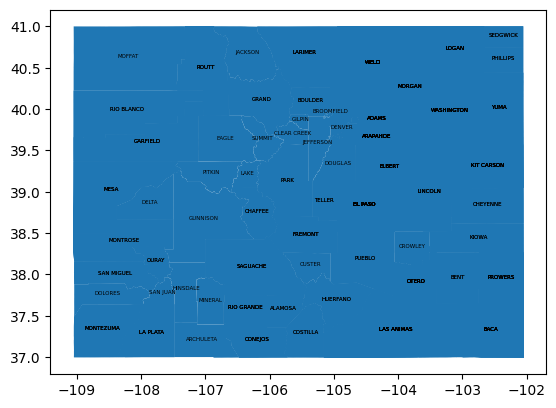

In [ ]:
ax=colc.plot() #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.COUNTY):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=4) #ytext=(3, 3), textcoords="offset points"

In [ ]:
!wget -q -O col.zip https://github.com/beryl09/beryl09/raw/main/CDPHE_CDOE_School_District_Boundaries.zip
zip_ref = zipfile.ZipFile('col.zip', 'r');zip_ref.extractall(); zip_ref.close()
!ls
!ls CDPHE_CDOE_School_District_Boundaries
col = gpd.read_file('CDPHE_CDOE_School_District_Boundaries/CDPHE_CDOE_School_District_Boundaries.shp')
#col.dtypes
#col.head(3)

a.zip					   Colorado_County_Boundaries.dbf  col.zip
CDPHE_CDOE_School_District_Boundaries	   Colorado_County_Boundaries.prj  __MACOSX
CDPHE_CDOE_School_District_Boundaries.zip  Colorado_County_Boundaries.shp  sample_data
Colorado_County_Boundaries.cpg		   Colorado_County_Boundaries.shx  schools.xlsx
CDPHE_CDOE_School_District_Boundaries.cpg  CDPHE_CDOE_School_District_Boundaries.shp
CDPHE_CDOE_School_District_Boundaries.dbf  CDPHE_CDOE_School_District_Boundaries.shx
CDPHE_CDOE_School_District_Boundaries.prj


<Axes: >

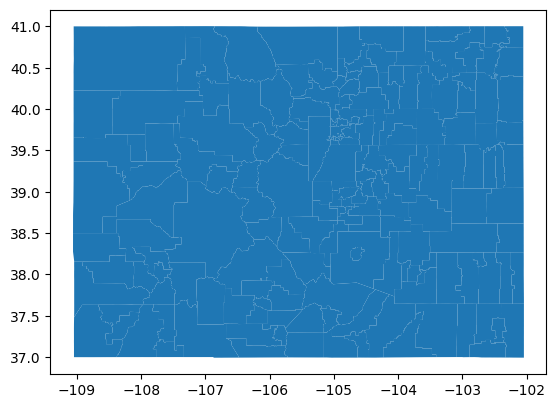

In [ ]:
col.plot()

In [117]:
colP = col.copy()

colP["geometry"] = colP["geometry"].centroid # code for changing polygon to points

<ipython-input-117-d7aa8b16e5f1>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  colP["geometry"] = colP["geometry"].centroid # code for changing polygon to points


In [118]:
colP.head(3)

,OBJECTID,GEOID,NAME,geometry
0,1,0800001,Cheyenne County School District RE-5,POINT (-102.32762 38.82591)
1,2,0800016,Yuma School District 1,POINT (-102.62607 40.11866)
2,3,0800017,Wray School District RD-2,POINT (-102.24664 40.11765)


<Axes: >

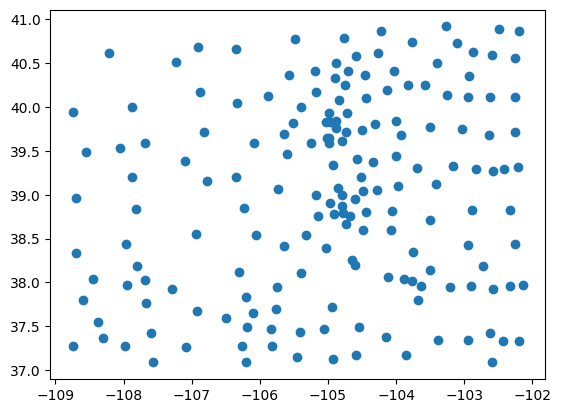

In [119]:
colP.plot()

Text(-102.32762082890386, 38.825910962582775, 'Cheyenne County School District RE-5')

Text(-102.6260694049328, 40.11865931028717, 'Yuma School District 1')

Text(-102.2466411868453, 40.11765141278546, 'Wray School District RD-2')

Text(-102.25566608918002, 39.71212080978558, 'Idalia School District RJ-3')

Text(-102.62977400651853, 39.6768602349539, 'Liberty School District J-4')

Text(-104.78909508842585, 38.99162015539705, 'Academy School District 20')

Text(-104.87490915624323, 39.83730487802081, 'Adams County School District 14')

Text(-103.99621733739875, 39.44647549806279, 'Agate School District 300')

Text(-104.54169973799281, 37.49512394112883, 'Aguilar Reorganized School District 6')

Text(-103.25674745432885, 40.139804312721004, 'Akron School District R-1')

Text(-105.83196016275053, 37.470956915529605, 'Alamosa School District RE-11J')

Text(-106.2001816703957, 37.08711276985818, 'South Conejos School District RE-10')

Text(-107.08014330037736, 37.26389098236557, 'Archuleta County School District 50-JT')

Text(-103.02992988999175, 39.75288869278373, 'Arickaree School District R-2')

Text(-103.15869807487131, 39.32921334428179, 'Arriba-Flagler School District C-20')

Text(-106.76928311489304, 39.153701852039184, 'Aspen School District 1')

Text(-104.76069039589889, 40.79147448164759, 'Ault-Highland School District RE-9')

Text(-104.73312194006019, 39.718927383119095, 'Adams-Arapahoe School District 28J')

Text(-105.5937953329777, 39.465493187160746, 'Platte Canyon School District 1')

Text(-107.6038703163907, 37.42657409214206, 'Bayfield School District 10 JT-R')

Text(-104.49656371613877, 39.73901975949382, 'Bennett School District 29-J')

Text(-102.41705731776746, 39.299477904346915, 'Bethune School District R-5')

Text(-105.3956427740194, 39.99814786177455, 'Boulder Valley School District RE-2')

Text(-103.84863875201114, 37.16886614532182, 'Branson Reorganized School District 82')

Text(-104.26384096609135, 40.619503081092, 'Briggsdale School District RE-10')

Text(-104.71383942197339, 39.93627139141545, 'School District 27J')

Text(-103.57011107233197, 40.25214879393472, 'Brush School District RE-2J')

Text(-106.23362065807947, 38.84468586391956, 'Buena Vista School District R-31')

Text(-102.20492108380269, 39.31888374739718, 'Burlington School District RE-6J')

Text(-104.00325113360284, 39.83923077487715, 'Byers School District 32J')

Text(-104.28530383722804, 39.05863546386649, 'Calhan School District RJ-1')

Text(-102.59793796098555, 37.086336996218364, 'Campo School District RE-6')

Text(-105.32714085565689, 38.53523125443404, 'Cañon City School District RE-1')

Text(-106.19799468703175, 37.83145939792297, 'Center School District 26-JT')

Text(-103.50811628862718, 38.14607231411603, 'Cheraw School District 31')

Text(-104.78620924048744, 39.61543561902817, 'Cherry Creek School District 5')

Text(-104.90842461378814, 38.7780944807632, 'Cheyenne Mountain School District 12')

Text(-105.6443634880744, 39.68905385306841, 'Clear Creek School District RE-1')

Text(-107.88209340882283, 39.19799626033615, 'Plateau Valley School District 50')

Text(-104.79595993440526, 38.87086367122217, 'Colorado Springs School District 11')

Text(-108.74346022028294, 37.272299716785426, 'Montezuma-Cortez School District RE-1')

Text(-105.65222188978929, 38.42063243295122, 'Cotopaxi School District RE-3')

Text(-106.92409464633947, 37.66899568249479, 'Creede School District')

Text(-105.14768102401175, 38.75597316829791, 'Cripple Creek-Victor School District RE-1')

Text(-103.75261545581446, 38.348551378721986, 'Crowley County School District RE-1-J')

Text(-108.54859742458352, 39.48388502049114, 'De Beque School District 49-JT')

Text(-103.92440041468136, 39.677778530571764, 'Deer Trail School District 26J')

Text(-106.50159440535481, 37.597831422558755, 'Upper Rio Grande School District C-7')

Text(-107.82302737583538, 38.83987268287914, 'Delta County School District 50J')

Text(-104.87576889456761, 39.76197875255291, 'Denver County School District 1')

Text(-108.37243331574008, 37.546298371876304, 'Dolores School District RE-4A')

Text(-108.59137112794194, 37.797832979699635, 'Dolores County School District RE-2')

Text(-104.92028482312931, 39.33560678538994, 'Douglas County School District RE-1')

Text(-107.97367772287983, 37.26978894254536, 'Durango School District 9-R')

Text(-102.94790240871276, 38.429414402281765, 'Eads School District RE-1')

Text(-106.81347879431864, 39.712529394714906, 'Eagle County School District RE 50')

Text(-104.59119621306935, 40.577718542739696, 'Eaton School District RE-2')

Text(-104.06998844755324, 38.59572724630079, 'Edison School District 54-JT')

Text(-104.51343042573049, 39.200566824149405, 'Elbert School District 200')

Text(-104.5728486978534, 39.41003987758158, 'Elizabeth School District')

Text(-104.44527736436092, 38.80873501109806, 'Ellicott School District 22')

Text(-104.9914349573972, 39.6486645165342, 'Englewood School District 1')

Text(-105.57612882577689, 40.371066570756, 'Estes Park School District R-3')

Text(-105.737885779875, 39.06145647604432, 'Park County School District RE-2')

Text(-104.60461358029042, 38.950291149247754, 'School District 49')

Text(-102.864001717869, 40.63255446079512, 'Frenchman School District RE-3')

Text(-105.02480533240502, 38.388823731600866, 'Fremont RE-2')

Text(-105.48674482565684, 40.77343202840767, 'Poudre School District R-1')

Text(-104.83721849391081, 40.0824057042539, 'Weld County School District RE-8')

Text(-103.82040552739902, 40.25320759931439, 'Fort Morgan School District RE-3')

Text(-104.7369456889372, 38.669105018208825, 'Fountain School District 8')

Text(-104.11159279735946, 38.06145348438338, 'Fowler School District R-4J')

Text(-105.40305284293125, 37.43722012694373, 'Sierra Grande School District R-30')

Text(-104.74563009709232, 40.25219527753093, 'Weld County School District RE-1')

Text(-105.51755676279699, 39.822545490548144, 'Gilpin County School District RE-1')

Text(-107.09995525294441, 39.390501292359446, 'Roaring Fork School District RE-1')

Text(-102.32899379893347, 37.95703457157399, 'Granada School District RE-1')

Text(-105.88126487135598, 40.127433670464036, 'East Grand School District 2')

Text(-108.69805827957187, 38.95795827298373, 'Mesa County Valley School District 51')

Text(-108.05774766169895, 39.53596571221345, 'Garfield County School District 16')

Text(-104.7003423429194, 40.407087369620534, 'Greeley School District 6')

Text(-104.22398899753662, 40.87112262073163, 'Pawnee School District RE-12')

Text(-106.93700356739967, 38.55498110340444, 'Gunnison Watershed School District RE-1J')

Text(-104.48228655947595, 38.60021430124444, 'Hanover School District 28')

Text(-104.77290920923888, 38.79223055614479, 'Harrison School District 2')

Text(-102.59025577954417, 40.593153107971354, 'Haxtun School District RE-2J')

Text(-107.23281120769214, 40.51363652203053, 'Hayden School District RE-1')

Text(-107.29656245491853, 37.923807783324385, 'Hinsdale County School District RE-1')

Text(-104.14476320846859, 37.379819610032726, 'Hoehne Reorganized School District 3')

Text(-102.13832285589595, 37.96891419407753, 'Holly School District RE-3')

Text(-102.25932450609041, 40.561575186796915, 'Holyoke School District RE-1J')

Text(-103.41850690122999, 39.11871578207712, 'Genoa-Hugo School District C-113')

Text(-107.57177168685553, 37.08762949900569, 'Ignacio School District 11-JT')

Text(-105.24978481663426, 39.58808480478001, 'Jefferson County School District R-1')

Text(-104.90354650856084, 40.3284204270116, 'Johnstown-Milliken School District RE-5J')

Text(-102.19140645683977, 40.871013555508334, 'Julesburg School District RE-1')

Text(-103.50746920131105, 38.71628638659765, 'Karval School District RE-23')

Text(-104.44426221544597, 40.10097516731439, 'Weld County School District RE-3J')

Text(-104.460238765323, 40.369399156691145, 'Platte Valley School District RE-7')

Text(-103.37742769636664, 37.339445469462966, 'Kim Reorganized School District 88')

Text(-104.34093667802794, 39.37404968137618, 'Kiowa School District C-2')

Text(-102.88662252423362, 38.83002329772321, 'Kit Carson School District R-1')

Text(-106.33152259959222, 40.0507276261036, 'West Grand School District 1-JT')

Text(-106.25719207837358, 37.275792118779314, 'North Conejos School District RE-1J')

Text(-103.68075229010196, 37.804409293741536, 'East Otero School District R-1')

Text(-105.06329936040957, 37.466336461492965, 'La Veta School District RE-2')

Text(-106.34483773430324, 39.202379470514046, 'Lake County School District R-1')

Text(-102.57430818458893, 37.92697096480656, 'Lamar School District RE-2')

Text(-103.21495957027469, 37.94234742874255, 'Las Animas School District RE-1')

Text(-103.69641743459057, 39.301033598873126, 'Limon School District RE-4J')

Text(-104.98935995348948, 39.59463704127162, 'Littleton School District 6')

Text(-102.9281503059906, 40.35015655602578, 'Lone Star School District 101')

Text(-105.17602162884424, 40.171115589793715, 'St. Vrain Valley School District RE 1J')

Text(-105.18358451195039, 40.41189861287109, 'Thompson School District R-2J')

Text(-108.29520246551294, 37.3611488914205, 'Mancos School District RE-6')

Text(-104.97546628450887, 38.90180578548377, 'Manitou Springs School District 14')

Text(-103.88949635790564, 38.044098955001814, 'Manzanola School District 3J')

Text(-104.96939666698874, 39.83351085590668, 'Mapleton School District 1')

Text(-102.89807815885736, 37.95709695243076, 'McClave School District RE-2')

Text(-107.8785750469741, 39.998987030751415, 'Meeker School District RE1')

Text(-103.3994394610021, 40.506139865318, 'Buffalo School District RE-4')

Text(-104.0625783320399, 38.8177710329702, 'Miami-Yoder School District 60-JT')

Text(-105.74162632051812, 37.952244056023154, 'Moffat School District 2')

Text(-108.20729060393536, 40.618422220014274, 'Moffat County School District RE-1')

Text(-106.18814612444335, 37.493299960611715, 'Monte Vista School District C-8')

Text(-107.96772091204303, 38.438664379903415, 'Montrose County School District RE-1J')

Text(-104.85776390488883, 39.08240519444506, 'Lewis-Palmer School District 38')

Text(-108.69774492188714, 38.331194539283736, 'West End School District RE-2')

Text(-108.44261018377662, 38.039118619530974, 'Norwood School District R-2J')

Text(-106.88370219204467, 40.16782704709338, 'South Routt School District RE-3')

Text(-102.94460431428332, 40.11519730070446, 'Otis School District R-3')

Text(-107.69124120007505, 38.02467221782081, 'Ouray School District R-1')

Text(-102.48191801327887, 40.88616947379809, 'Revere School District')

Text(-103.27149270171746, 40.91991410706339, 'Plateau School District RE-5')

Text(-104.47941504062295, 39.04539526003443, 'Peyton School District 23-JT')

Text(-102.94376956066037, 37.34291362024786, 'Pritchett School District RE-3')

Text(-104.64377852536258, 38.25169232187571, 'Pueblo City School District 60')

Text(-104.59661637621582, 38.19584849675551, 'Pueblo County School District 70')

Text(-108.74146117721274, 39.948657104540814, 'Rangely School District RE-4')

Text(-107.8075020349012, 38.19222275333933, 'Ridgway School District R-2')

Text(-107.69230041915017, 39.58900286399191, 'Garfield School District RE-2')

Text(-103.76236999998788, 38.01348509190432, 'Rocky Ford School District R-2')

Text(-106.29957269888281, 38.11328989454459, 'Mountain Valley School District RE-1')

Text(-106.05389521024823, 38.54602184163798, 'Salida School District R-32')

Text(-105.44947210265978, 37.1438067830954, 'Centennial School District R-1')

Text(-105.82221996281855, 37.26944023806481, 'Sanford School District 6J')

Text(-105.76876963869562, 37.69113131819516, 'Sangre de Cristo School District RE-22J')

Text(-106.098214120065, 37.649955379212976, 'Sargent School District RE-33J')

Text(-104.68341867522322, 38.761284244633934, 'Widefield School District 3')

Text(-102.82024878062259, 39.294540851952, 'Hi-Plains School District R-23')

Text(-105.0175343056373, 39.64516474541488, 'Sheridan School District 2')

Text(-107.67614727490978, 37.76404307296377, 'Silverton School District 1')

Text(-103.97087873799451, 39.09539204863473, 'Big Sandy School District 100J')

Text(-102.62163581352522, 37.426936932549054, 'Springfield School District RE-4')

Text(-106.91159287307391, 40.68602510455043, 'Steamboat Springs School District RE-2')

Text(-103.10728760470045, 40.73188099456179, 'Valley School District RE-1')

Text(-103.7722516432265, 40.745884277446905, 'Prairie School District RE-11')

Text(-104.30574178949854, 39.80689508007564, 'Strasburg School District 31J')

Text(-102.57221911643393, 39.27650735307773, 'Stratton School District R-4')

Text(-106.07830799669276, 39.593059843813144, 'Summit School District RE-1')

Text(-103.63751500043035, 37.96376657923152, 'Swink School District 33')

Text(-107.9561423607245, 37.96598745338101, 'Telluride School District R-1')

Text(-104.98989625107069, 39.92835073409121, 'Adams 12 Five Star Schools')

Text(-102.24983361671767, 38.44041449587292, 'Plainview School District RE-2')

Text(-104.59040188030455, 37.166221933701294, 'Trinidad School District 1')

Text(-102.43338594853635, 37.33682524930287, 'Vilas School District RE-5')

Text(-106.34279468757859, 40.66643268416341, 'North Park School District R-1')

Text(-104.94384177804912, 37.72027008596362, 'Huerfano School District RE-1')

Text(-102.19819829714145, 37.3301112383539, 'Walsh School District RE-1')

Text(-104.02980829053912, 40.40964968519311, 'Weldon Valley School District RE-20J')

Text(-105.3918099781766, 38.10231738974012, 'Custer County School District C-1')

Text(-105.0292027634011, 39.83139005253686, 'Westminster Public School District')

Text(-104.91896014062648, 37.123849610246445, 'Primero Reorganized School District 2')

Text(-104.13203253250322, 40.19906356627146, 'Wiggins School District RE-50J')

Text(-102.73021858684035, 38.18834374615013, 'Wiley School District RE-13-JT')

Text(-104.87695767077938, 40.500990815226615, 'Windsor School District RE-4')

Text(-105.17474861520539, 38.99843864340132, 'Woodland Park School District RE-2')

Text(-103.5054655714474, 39.76865149607996, 'Woodlin School District R-104')

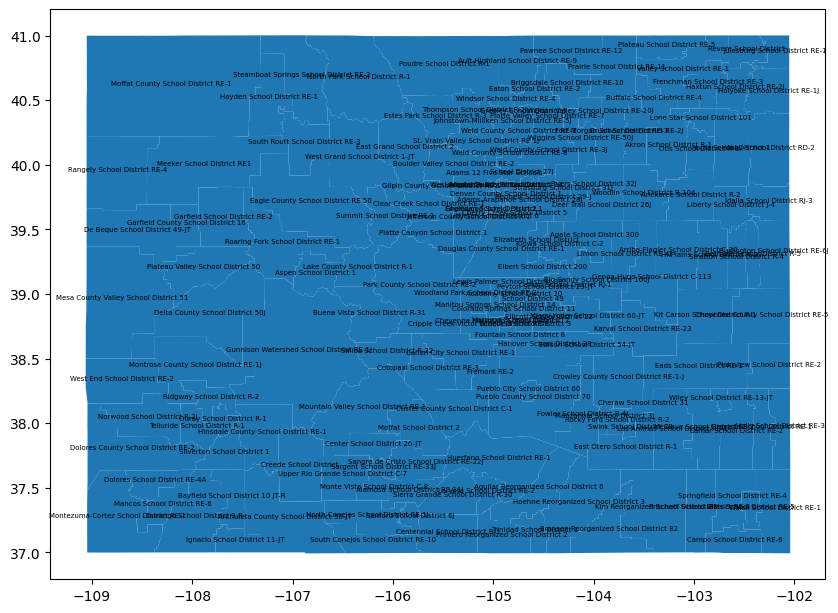

In [128]:
ax=col.plot(figsize=(10,10)) #https://stackoverflow.com/questions/38899190/geopandas-label-polygons
for x, y, label in zip(colP.geometry.x, colP.geometry.y, colP.NAME):
    ax.annotate(label, xy=(x, y),horizontalalignment='center', fontsize=5) #ytext=(3, 3), textcoords="offset points"